In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

## Punto 1

In [5]:
respondieron = pd.read_csv('respondieron.csv')

In [489]:
norespondieron = pd.read_csv('norespondieron.csv')

In [8]:
respondieronconaños = pd.read_csv('respondieron_con_años.csv')

In [9]:
respondieronconaños

,cond. de actividad,PEA,ano4
0,3.0,2.0,2004.0
1,1.0,1.0,2004.0
2,3.0,2.0,2004.0
3,1.0,1.0,2004.0
4,3.0,2.0,2004.0
...,...,...,...
14642,3.0,2.0,2024.0
14643,2.0,1.0,2024.0
14644,1.0,1.0,2024.0
14645,1.0,1.0,2024.0


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [11]:
respondieron["desocupado"] = (respondieronconaños["PEA"] == 1).astype(int)

In [12]:
print(respondieronconaños["ano4"].unique()) #estan bien cargados los dos años (2004) y (2024)

[2004. 2024.]


In [13]:
respondieronconaños["desocupado"] = (respondieronconaños["PEA"] == 1).astype(int) 
#Para cada valor 1 de PEA, la tabla de desocupado devuelve 1, para otro valor devuelve 0. Es un booleano.

In [14]:
for año in respondieronconaños["ano4"].unique():
    print(f"\nProcesando año: {año}")
    
    df_anual = respondieronconaños[respondieronconaños["ano4"] == año]
    
    y = df_anual["desocupado"] #Esta será nuestra variable independiente
    
    X = pd.get_dummies(df_anual["PEA"], prefix="PEA", drop_first=True) #Usamos solo PEA, con valores booleanos como predictor
    X = X.astype(int) #Consideramos más comodo trabajar con unos y ceros
    X = X.copy() #Esto para evitar warnings y errores
    X["intercept"] = 1 #La columna de unos es útil para la ordenada al origen, Beta sub 0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=444) #Requerimientos de la consigna
    print(f"Año {año}:")
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
    #Podemos ver ahora la cantidad de filas y columnas que tienen nuestras muestras en cada año.


Procesando año: 2004.0
Año 2004.0:
Train shape: (5352, 2), Test shape: (2295, 2)

Procesando año: 2024.0
Año 2024.0:
Train shape: (4900, 2), Test shape: (2100, 2)


#### Evitamos Multicolinealidad
Decidimos eliminar una columna PEA de las dos que generan las dummies, porque ya sabemos que si una es verdadera, la otra es falsa, entonces podemos evitarnos esta relación excluyente que tienen. Tampoco es útil la multicolinealidad para interpretar los coeficientes, por lo que para evitar confusiones es mejor no tenerlo en nuestro modelo. Así que solo tendremos en cuenta PEA 2, que adopta 1 si es Población inactiva, y adopta 0 si es Población economicamente activa (donde se encuentran los desocupados)
Por otro lado, por si no se notó, decidimos eliminar Cond. de actividad, debido a que lo consideramos algo ilógico desde lo predictivo, porque estariamos prediciendo nuestra variable objetivo con una columna que incluye directamente la variable objetivo (Multicolinealidad muy alta)

In [16]:
X

,PEA_2.0,intercept
7647,0,1
7648,1,1
7649,1,1
7650,0,1
7651,0,1
...,...,...
14642,1,1
14643,0,1
14644,0,1
14645,0,1


In [17]:
common_cols = X_train.columns.intersection(X_test.columns)


In [18]:
mean_train = X_train[common_cols].mean()
mean_test = X_test[common_cols].mean()

In [19]:
diff_table = pd.DataFrame({
    "Media Entrenamiento": mean_train,
    "Media Testeo": mean_test,
    "Diferencia Absoluta": (mean_train - mean_test).abs()
})
diff_table = diff_table.sort_values("Diferencia Absoluta", ascending=False)
print(diff_table)

           Media Entrenamiento  Media Testeo  Diferencia Absoluta
PEA_2.0               0.487347      0.517143             0.029796
intercept             1.000000      1.000000             0.000000


### Conclusión
La tabla de diferencia de medias muestra que las medias de las variables explicativas en los conjuntos de entrenamiento y testeo son muy similares. La variable PEA presenta una diferencia absoluta pequeña de aproximadamente 0.03, lo que sugiere una distribución equilibrada.

## Punto 2

In [106]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [108]:
edad = pd.read_csv("edad.csv")

In [110]:
edad2 = pd.read_csv("edad2.csv")

In [112]:
horastrab = pd.read_csv("horastrab.csv")

In [114]:
pd.set_option('display.float_format', '{:,.2f}'.format)


In [116]:
salario_semanal = pd.read_csv("salario semanal.csv")


In [118]:
salario_semanal=salario_semanal[salario_semanal["salario semanal"]>0] #Consideramos irrelevantes los salarios que son 0
salario_semanal.describe()

,año,salario semanal
count,"5,014.00","5,014.00"
mean,"2,012.74","181,379.51"
std,9.92,"351,329.81"
min,"2,004.00",150.00
25%,"2,004.00","14,100.00"
50%,"2,004.00","36,000.00"
75%,"2,024.00","250,000.00"
max,"2,024.00","8,000,000.00"


In [120]:
educ = pd.read_csv("educ.csv")

In [122]:
Ocupados=pd.read_csv("Ocupados.csv")

In [124]:
Ocupados

,año,estado
0,"2,004.00",1.00
1,"2,004.00",1.00
2,"2,004.00",1.00
3,"2,004.00",1.00
4,"2,004.00",1.00
...,...,...
23399,"2,024.00",1.00
23400,"2,024.00",1.00
23401,"2,024.00",1.00
23402,"2,024.00",1.00


In [348]:
OcupadosEPH = Ocupados.combine_first(edad).dropna()


In [350]:
OcupadosEPH=OcupadosEPH.combine_first(edad2).dropna()

In [352]:
OcupadosEPH = OcupadosEPH.combine_first(educ).dropna()

In [354]:
OcupadosEPH = OcupadosEPH.combine_first(horastrab).dropna()

In [356]:
OcupadosEPH = OcupadosEPH.combine_first(salario_semanal).dropna()
OcupadosEPH = OcupadosEPH.astype(int)

In [358]:
OcupadosEPH

,año,edad,edad2,educ,estado,horastrab,salario semanal
3,2004,54,2916,10,1,59,60000
5,2004,25,625,16,1,2,900
6,2004,20,400,11,1,6,3000
7,2004,55,3025,9,1,55,24000
12,2004,50,2500,11,1,40,22500
...,...,...,...,...,...,...,...
7176,2024,52,2704,3,1,0,18000
7178,2024,56,3136,4,1,0,3000
7182,2024,48,2304,0,1,0,8400
7194,2024,52,2704,16,1,0,30000


### i)

In [361]:
y=OcupadosEPH[["salario semanal"]]
x=OcupadosEPH[["edad"]]


In [363]:
model = LinearRegression().fit(x, y)
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)


Intercepto: [11351.25429299]

Pendiente: [[263.47816529]]


In [365]:
model = sm.OLS(y, x)
# Ajustamos el modelo
results = model.fit()
print(results.params)

edad   519.83
dtype: float64


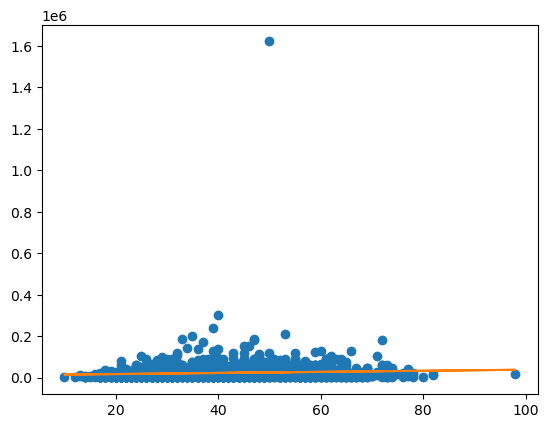

In [367]:
plt.plot(x, y, 'o')
plt.plot(x, pendiente*x + intercepto) #Notamos que hay valores extremos que no nos permiten analizar bien.

In [368]:
# Calcular el percentil 99 del salario semanal
percentil_99 = np.percentile(y, 99)

mask = y["salario semanal"] < percentil_99

x_percentil = x[mask]
y_percentil = y[mask]



In [369]:
model_ajust = LinearRegression().fit(x_percentil, y_percentil)
intercepto = model_ajust.intercept_
pendiente = model_ajust.coef_

print('\nPendiente:', pendiente)
print('\nIntercepto:', intercepto)


Pendiente: [[190.82007299]]

Intercepto: [12274.37459342]


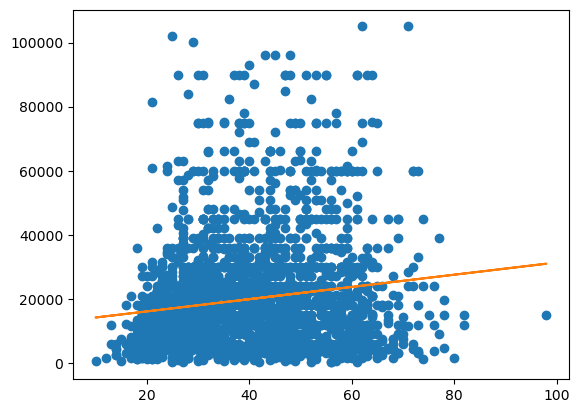

In [370]:
plt.plot(x_percentil, y_percentil, 'o')
plt.plot(x_percentil, pendiente*x_percentil + intercepto) #Ahora si notamos que tenga un mejor sentido
#Ahora si usamos una muestra de entrenamiento y una de testeo.

#### Usamos una muestra de testeo y una de entrenamiento para chequear que tan bueno es prediciendo nuestro modelo

In [372]:
X_train, X_test, y_train, y_test = train_test_split(x_percentil, y_percentil, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:        salario semanal   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     48.27
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           5.19e-12
Time:                        15:30:10   Log-Likelihood:                -19998.
No. Observations:                1789   AIC:                         4.000e+04
Df Residuals:                    1787   BIC:                         4.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.198e+04   1262.812      9.486      0.0

#### Conclusión: El R2 de por si es muy bajo, explica solo un 2% y el alternativo un 0,6% por lo que usar las edades para predecir los salarios semanales no es algo que nos sirva mucho. Encima cuando testeamos nos da un R^2 aún más bajo. Por lo que lamentablemente tenemos que decir que nuestro modelo es pésimo prediciendo los salarios semanales de la gente. En otras palabras, edad y edad al cuadrado son pésimos predictores del salario semanal.

### ii)

In [379]:
y=OcupadosEPH[["salario semanal"]]
x=OcupadosEPH[["edad", "edad2"]]

percentil_99 = np.percentile(y, 99)

mask = y["salario semanal"] < percentil_99

x = x[mask]
y = y[mask] #Esta vez no le pondremos percentil para no hacer muy denso los códigos, pero trabajaremos con este percentil durante el punto 2

In [381]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:        salario semanal   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     43.38
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           4.03e-19
Time:                        15:30:10   Log-Likelihood:                -19979.
No. Observations:                1789   AIC:                         3.996e+04
Df Residuals:                    1786   BIC:                         3.998e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7027.3918   3346.056     -2.100      0.0

#### Edad y edad al cuadrado no explican bien el modelo, por eso es que el coeficiente de determinación (R2) es 0,04, y peor aún el de testeo que es de un 2%. Nuestro MSE en ambos casos será terriblemente alto. Por lo que nuevamente nuestro modelo es pésimo para predecir el salario semanal.

### iii)


In [386]:
y=OcupadosEPH[["salario semanal"]]
x=OcupadosEPH[["edad", "edad2","educ"]]

percentil_99 = np.percentile(y, 99)

mask = y["salario semanal"] < percentil_99

x = x[mask]
y = y[mask]

In [388]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

# 6️⃣ Calcular MSE en train y test
y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:        salario semanal   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     29.45
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.39e-18
Time:                        15:30:11   Log-Likelihood:                -19978.
No. Observations:                1789   AIC:                         3.996e+04
Df Residuals:                    1785   BIC:                         3.999e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7913.9824   3419.141     -2.315      0.0

#### Podemos notar que el R^2 es casi idéntico a cuando solo teniamos edad y edad al cuadrado (aunque por muy poco es superior). Igualmente en la muestra de testeo sigue funcionando mal. Así que este modelo tampoco es bueno prediciendo salario semanal.

### iv)

In [392]:
ch04 = pd.read_csv("ch04.csv")

In [393]:
ch04

,Genero
0,1.00
1,2.00
2,2.00
3,1.00
4,2.00
...,...
14693,2.00
14694,1.00
14695,1.00
14696,1.00


In [394]:
mujer=ch04
mujer=pd.get_dummies(mujer['Genero'], prefix='Genero', dtype=int)
mujer=mujer.drop("Genero_1.0", axis=1)
mujer=mujer.rename(columns={"Genero_2.0":"mujer"})

In [395]:
OcupadosEPH=pd.concat([OcupadosEPH,mujer],axis=1)
OcupadosEPH=OcupadosEPH.dropna()

In [396]:
y = OcupadosEPH[["salario semanal"]]
x = OcupadosEPH[["edad", "edad2", "educ", "mujer"]]


In [397]:
percentil_99 = np.percentile(y, 99)
mask = y["salario semanal"] < percentil_99

In [404]:
x = x[mask]
y = y[mask]

In [406]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

X_train_sm = sm.add_constant(X_train)  
X_test_sm = sm.add_constant(X_test)    

modelo = sm.OLS(y_train, X_train_sm).fit()
print(modelo.summary()) 

coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

# 6️⃣ Calcular MSE en train y test
y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)

                            OLS Regression Results                            
Dep. Variable:        salario semanal   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     40.48
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.66e-32
Time:                        15:30:12   Log-Likelihood:                -19944.
No. Observations:                1789   AIC:                         3.990e+04
Df Residuals:                    1784   BIC:                         3.992e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5877.9491   3363.581     -1.748      0.0

#### Hubo una mejoría en este modelo, ahora el R^2 de entrenamiento es del 8% y cuando lo testeamos es del 3%. Obviamente sigue siendo muy malo explicando la varianza del modelo, pero al menos significó un avance.

### v)

In [410]:
#Para hacer la ultima regresion lineal tuvimos que buscar nuevas variables en la eph ya que tanto en el tp2 como en el tp3 no teniamos vaariables creadas para usar, asi que utilizamos la variable saber escribir y leer donde 1=si y 2=no

In [412]:
varnu = pd.read_csv("varnueva.csv")

In [414]:
varnu

,sabe escribir
0,1
1,1
2,1
3,1
4,1
...,...
13422,1.0
13423,1.0
13424,1.0
13425,1.0


In [416]:
varnu["sabe escribir"] = pd.to_numeric(varnu["sabe escribir"], errors='coerce')

varnu = varnu.dropna(subset=["sabe escribir"])

varnu["sabe escribir"] = varnu["sabe escribir"].astype(int)

#esto lo hacemos para obtener numeros enteros y no trabajar con decimales 

C:\Users\Juan T\AppData\Local\Temp\ipykernel_9460\3320795527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  varnu["sabe escribir"] = varnu["sabe escribir"].astype(int)


In [418]:
escribe=varnu[(varnu["sabe escribir"]!=9) & (varnu["sabe escribir"]!=3)]
dummies_varnu = pd.get_dummies(escribe['sabe escribir'], prefix='sabe escribir', dtype=int)
escribe=dummies_varnu.drop("sabe escribir_1", axis=1)

In [420]:
estadocivil = pd.read_csv("estadocivil.csv")
estadocivil


,estado civil
0,4
1,3
2,4
3,2
4,2
...,...
14693,3
14694,5
14695,5
14696,5


In [422]:
estadocivildummie=pd.get_dummies(estadocivil['estado civil'], prefix='estado civil', dtype=int)
estadocivildummie=estadocivildummie.drop("estado civil_9", axis=1) #lo elimino porque son los valores faltantes o gente que no respondió
estadocivil=estadocivildummie.drop("estado civil_1", axis=1) #Elimino la columna de casado, para usarla como referencia

In [424]:
estadocivil

,estado civil_2,estado civil_3,estado civil_4,estado civil_5
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
14693,0,1,0,0
14694,0,0,0,1
14695,0,0,0,1
14696,0,0,0,1


In [426]:
ocupadoseph=pd.concat([OcupadosEPH, estadocivil], axis=1)
OcupadosEPH=ocupadoseph.dropna()

In [428]:
OcupadosEPH = pd.concat([OcupadosEPH,escribe],axis=1)
OcupadosEPH = OcupadosEPH.dropna()

In [430]:
columnas_a_redondear = ["año", "edad", "edad2", "educ", "estado", "horastrab", 
                        "salario semanal", "mujer", "estado civil_2", "estado civil_3", 
                        "estado civil_4", "estado civil_5", "sabe escribir_2"]

for col in columnas_a_redondear:
    OcupadosEPH[col] = OcupadosEPH[col].round(0).astype(int)
#Usamos esto para redondear los números y que no hayan decimales que sean incomodos a la vista y sin relvancia.

In [432]:
OcupadosEPH

,año,edad,edad2,educ,estado,horastrab,salario semanal,mujer,estado civil_2,estado civil_3,estado civil_4,estado civil_5,sabe escribir_2
3,2004,54,2916,10,1,59,60000,0,1,0,0,0,0
5,2004,25,625,16,1,2,900,1,0,0,0,1,0
6,2004,20,400,11,1,6,3000,1,0,0,0,1,0
7,2004,55,3025,9,1,55,24000,0,0,0,0,0,0
12,2004,50,2500,11,1,40,22500,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,2024,52,2704,3,1,0,18000,0,0,1,0,0,0
7178,2024,56,3136,4,1,0,3000,1,0,0,0,1,0
7182,2024,48,2304,0,1,0,8400,1,0,0,0,1,0
7194,2024,52,2704,16,1,0,30000,0,1,0,0,0,0


In [434]:
y = OcupadosEPH[["salario semanal"]]
x = OcupadosEPH[["edad", "edad2", "educ", "mujer", "estado civil_2","estado civil_3","estado civil_4","estado civil_5","sabe escribir_2"]]

percentil_99 = np.percentile(y, 99)
mask = y["salario semanal"] < percentil_99

x = x[mask]
y = y[mask]


In [436]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

# Suponiendo que tienes tus datos preparados como 'x' y 'y':
# x = df[['edad', 'educ', 'mujer', ...]]
# y = df['salario_semanal']

# 1️⃣ Split en train/test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 2️⃣ Agregar constante (intercepto)
X_train_sm = sm.add_constant(X_train)  # Para train
X_test_sm = sm.add_constant(X_test)    # Para test

# 3️⃣ Ajustar modelo OLS
modelo = sm.OLS(y_train, X_train_sm).fit()

# 4️⃣ Resultados del modelo
print(modelo.summary())  # Muestra la tabla completa (coef, std, p-valor, R2, etc.)

# 5️⃣ Extraer info para la tabla personalizada
coef = modelo.params
std_err = modelo.bse
p_values = modelo.pvalues
r2_train = modelo.rsquared
n_obs = int(modelo.nobs)

# 6️⃣ Calcular MSE en train y test
y_pred_train = modelo.predict(X_train_sm)
y_pred_test = modelo.predict(X_test_sm)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('\nCoeficientes:')
print(coef)
print('\nErrores estándar:')
print(std_err)
print('\nP-valores:')
print(p_values)
print('\nR^2 (train):', r2_train)
print('\nN observaciones (train):', n_obs)
print('\nMSE (train):', mse_train)
print('MSE (test):', mse_test)


                            OLS Regression Results                            
Dep. Variable:        salario semanal   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     21.87
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.68e-35
Time:                        15:30:18   Log-Likelihood:                -19928.
No. Observations:                1789   AIC:                         3.988e+04
Df Residuals:                    1779   BIC:                         3.993e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -6689.5171   3869.000     

#### Finalmente nos dió un R^2 de casi un 9% en la muestra de entrenamiento y casi un 4% en la muestra de testeo, siendo así el valor más alto que logramos con estas variables para explicar la variación del salario semanal. El MSE en ambos caso sigue siendo exageradamente alto, porque obviamente le estamos errando por mucho al predecir con estos predictores.

## Punto 3

In [440]:
x = OcupadosEPH[["edad"]]
y = OcupadosEPH[["salario semanal"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

modelo1 = LinearRegression().fit(x_train, y_train)
y_pred1 = modelo1.predict(x_test)

mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
mae1 = mean_absolute_error(y_test, y_pred1)


In [442]:
print("Modelo 1 solo edad")
print("MSE test:", mse1)
print("RMSE test:", rmse1)
print("MAE test:", mae1)

Modelo 1 solo edad
MSE test: 591364718.5146178
RMSE test: 24317.991662853612
MAE test: 14857.02920815818


In [444]:
x2 = OcupadosEPH[["edad", "edad2"]]

x2_train, x2_test, _, _ = train_test_split(x2, y, test_size=0.3, random_state=42)

modelo2 = LinearRegression().fit(x2_train, y_train)
y_pred2 = modelo2.predict(x2_test)

print("\nModelo 2 (edad, edad2)")
print("MSE test:", mean_squared_error(y_test, y_pred2))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("MAE test:", mean_absolute_error(y_test, y_pred2))



Modelo 2 (edad, edad2)
MSE test: 581252431.1996597
RMSE test: 24109.17732316181
MAE test: 14631.744550972237


In [446]:
x3 = OcupadosEPH[["edad", "edad2", "educ"]]

x3_train, x3_test, _, _ = train_test_split(x3, y, test_size=0.3, random_state=42)

modelo3 = LinearRegression().fit(x3_train, y_train)
y_pred3 = modelo3.predict(x3_test)

print("\nModelo 3 (edad, edad2, educ)")
print("MSE test:", mean_squared_error(y_test, y_pred3))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred3)))
print("MAE test:", mean_absolute_error(y_test, y_pred3))



Modelo 3 (edad, edad2, educ)
MSE test: 586252962.6201948
RMSE test: 24212.661204836506
MAE test: 14800.243205025485


In [448]:
x4 = OcupadosEPH[["edad", "edad2", "educ", "mujer"]]

x4_train, x4_test, _, _ = train_test_split(x4, y, test_size=0.3, random_state=42)

modelo4 = LinearRegression().fit(x4_train, y_train)
y_pred4 = modelo4.predict(x4_test)

print("\nModelo 4 (edad, edad2, educ, mujer)")
print("MSE test:", mean_squared_error(y_test, y_pred4))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred4)))
print("MAE test:", mean_absolute_error(y_test, y_pred4))



Modelo 4 (edad, edad2, educ, mujer)
MSE test: 574227462.5701345
RMSE test: 23963.04368334988
MAE test: 14654.065444557262


In [450]:
x5 = OcupadosEPH[["edad", "edad2", "educ", "mujer", "estado civil_2","estado civil_3","estado civil_4","estado civil_5","sabe escribir_2"]]

x5_train, x5_test, _, _ = train_test_split(x5, y, test_size=0.3, random_state=42)

modelo5 = LinearRegression().fit(x5_train, y_train)
y_pred5 = modelo5.predict(x5_test)

print("\nModelo 5 (edad, edad2, educ, mujer, sabe_escribir2, estadocivil)")
print("MSE test:", mean_squared_error(y_test, y_pred5))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_pred5)))
print("MAE test:", mean_absolute_error(y_test, y_pred5))



Modelo 5 (edad, edad2, educ, mujer, sabe_escribir2, estadocivil)
MSE test: 561771502.9283441
RMSE test: 23701.719408691515
MAE test: 14656.05705175288


In [452]:
datos = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5'],
    'MSE test': [225915067.21, 221875782.24, 222634922.97, 219684081.69,  218155133.77],
    'RMSE test': [15030.47, 14895.49, 14920.95, 14821.74, 14770.07],
    'MAE test': [11053.95, 10958.21, 10978.33, 10923.18, 10872.58]
}


In [454]:
tabla_metricas = pd.DataFrame(datos)


In [456]:
print(tabla_metricas)


     Modelo       MSE test  RMSE test  MAE test
0  Modelo 1 225,915,067.21  15,030.47 11,053.95
1  Modelo 2 221,875,782.24  14,895.49 10,958.21
2  Modelo 3 222,634,922.97  14,920.95 10,978.33
3  Modelo 4 219,684,081.69  14,821.74 10,923.18
4  Modelo 5 218,155,133.77  14,770.07 10,872.58


## Punto 5

In [458]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [459]:
print(OcupadosEPH.columns)


Index(['año', 'edad', 'edad2', 'educ', 'estado', 'horastrab',
       'salario semanal', 'mujer', 'estado civil_2', 'estado civil_3',
       'estado civil_4', 'estado civil_5', 'sabe escribir_2'],
      dtype='object')


In [460]:
print(np.unique(y))

[    150     240     300     450     600     900     960    1050    1200
    1260    1440    1500    1800    1860    2100    2160    2250    2400
    2700    2760    3000    3060    3300    3420    3600    3660    3750
    3900    3960    4200    4320    4350    4500    4560    4800    4860
    5100    5370    5400    5460    5700    5940    6000    6060    6300
    6480    6600    6660    6900    7200    7500    7650    7800    7920
    8010    8040    8100    8400    8700    9000    9060    9300    9600
    9900    9960   10200   10500   10800   10920   11100   11400   11460
   11700   11970   12000   12060   12150   12270   12600   12900   13200
   13500   13560   13800   13860   14100   14130   14400   15000   15060
   15120   15270   15360   15600   15750   15900   16200   16500   16560
   16800   16860   16920   17100   17190   17310   17400   17910   18000
   18060   18270   18300   18420   18480   18600   18720   18900   19200
   19260   19500   19800   20100   20190   20400   

=== Regresión Logística ===
Matriz de confusión:
[[ 42 194]
 [ 25 515]]
Accuracy: 0.7177835051546392
AUC: 0.6719397363465159

=== KNN (K=5) ===
Matriz de confusión:
[[ 43 193]
 [ 85 455]]
Accuracy: 0.6417525773195877
AUC: 0.5136809478970494


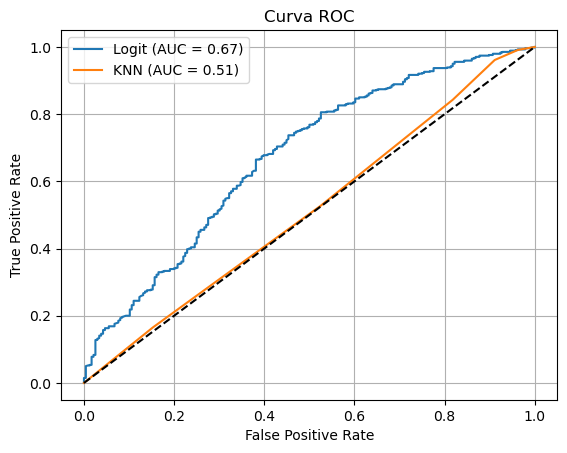

In [497]:
OcupadosEPH['salario_mayor_10000'] = (OcupadosEPH["salario semanal"] > 10000).astype(int)


X = OcupadosEPH[["edad", "edad2", "educ", "mujer", "estado civil_2","estado civil_3","estado civil_4","estado civil_5","sabe escribir_2"]]  # Agregá más si existen
y = OcupadosEPH["salario_mayor_10000"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


logit = LogisticRegression(max_iter=5000)
logit.fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
y_proba_logit = logit.predict_proba(X_test)[:, 1]  # Probabilidad para la clase 1


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]


print("=== Regresión Logística ===")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_logit))
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print("AUC:", roc_auc_score(y_test, y_proba_logit))

fpr_logit, tpr_logit, _ = roc_curve(y_test, y_proba_logit)
plt.plot(fpr_logit, tpr_logit, label="Logit (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_logit)))


print("\n=== KNN (K=5) ===")
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("AUC:", roc_auc_score(y_test, y_proba_knn))

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label="KNN (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_knn)))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

In [501]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Entrenar modelos
logreg = LogisticRegression(max_iter=5000)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [503]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    
    try:
        y_prob = modelo.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_prob)
    except:
        auc = None

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'AUC-ROC': auc
    }


In [505]:
resultados = {
    'Logistic Regression': evaluar_modelo(logreg, X_test, y_test),
    'Random Forest': evaluar_modelo(rf, X_test, y_test),
    'KNN': evaluar_modelo(knn, X_test, y_test)
}

import pandas as pd

df_resultados = pd.DataFrame(resultados).T
print(df_resultados)


                     Accuracy  Precision  Recall  F1-score  AUC-ROC
Logistic Regression      0.72       0.73    0.95      0.82     0.67
Random Forest            0.66       0.73    0.81      0.77     0.58
KNN                      0.64       0.70    0.84      0.77     0.51


## Punto 6

In [471]:
features = ['edad', 'edad2', 'educ', 'mujer', 'estado civil_2', 'estado civil_3', 'estado civil_4', 'estado civil_5', 'sabe escribir_2']



In [472]:
print(norespondieron.columns.tolist())


['cond. de actividad', 'ano4', 'sexo', 'edad', 'estado civil', 'seguro médico', 'nivel educativo', 'categoria inactivo', 'ipcf']


In [511]:
norespondieron=pd.read_csv("norespondieron_conaños.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'norespondieron_conaños.csv'